In [1]:
%matplotlib inline
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
import pickle

In [2]:
datafile = uproot.open("/mnt/Storage/fmanzali/FlatComplete/eplus_hits_dn_0.root")
datafile.keys()

[b'lpmt_hits;187',
 b'lpmt_hits;186',
 b'spmt_hits;5',
 b'spmt_hits;4',
 b'true_info;1',
 b'lpmt_pos;1',
 b'spmt_pos;1']

In [61]:
PMT_pos = datafile["lpmt_pos"]
PMT_pos_pd = PMT_pos.pandas.df()
PMT_pos_pd

,pmt_id,pmt_x,pmt_y,pmt_z
entry,,,,
0,0,1.049021e+03,0.000000,19171.320312
1,1,9.084785e+02,524.510315,19171.320312
2,2,5.245103e+02,908.478516,19171.320312
3,3,6.423399e-14,1049.020630,19171.320312
4,4,-5.245103e+02,908.478516,19171.320312
...,...,...,...,...
17734,17734,1.904750e+04,-2395.499268,-307.276520
17735,17735,1.910673e+04,-1865.088745,-307.276520
17736,17736,1.915119e+04,-1333.236816,-307.276520


In [91]:
def new_spherical (xyz):
    
    i = xyz['pmt_id'].values
    x = xyz['pmt_x'].values
    y = xyz['pmt_y'].values
    z = xyz['pmt_z'].values
    
    r = np.sqrt(x**2+y**2+z**2)
    theta = np.arccos(z/r)
    phi = np.zeros(len(x))
    phi[(x==0) & (y>0)] = np.pi/2
    phi[(x==0) & (y<0)] = 3*np.pi/2
    phi[(x>0) & (y>=0)] = np.arctan((y[(x>0) & (y>=0)])/(x[(x>0) & (y>=0)]))
    phi[(x>0) & (y<=0)] = np.arctan((y[(x>0) & (y<=0)])/(x[(x>0) & (y<=0)])) + 2*np.pi
    phi[(x<0) & (y>0)] = np.arctan((y[(x<0) & (y>0)])/(x[(x<0) & (y>0)])) + np.pi
    
    data = {'pmt_id': i, 'pmt_r': r, 'pmt_theta': theta, 'pmt_phi': phi }
    rtp = pd.DataFrame(data)
    return rtp

In [119]:
def new_spherical (xyz):
    data = []
    for i in range(0, len(xyz)):
        r = np.sqrt(xyz.loc[i, 'pmt_x']**2 + xyz.loc[0,'pmt_y']**2 + xyz.loc[i, 'pmt_z']**2)
        theta = np.arccos((xyz.loc[i, 'pmt_z'])/r)
        if xyz.loc[i, 'pmt_x'] == 0 and xyz.loc[i, 'pmt_y'] > 0:
            phi = np.pi/2
        if xyz.loc[i, 'pmt_x'] == 0 and xyz.loc[i, 'pmt_y'] > 0:
            phi = 3*np.pi/2
        if (xyz.loc[i, 'pmt_x'] > 0 and xyz.loc[i, 'pmt_y'] >= 0):
             phi = np.arctan((xyz.loc[i, 'pmt_y'])/(xyz.loc[i, 'pmt_x']))
        if (xyz.loc[i, 'pmt_x'] > 0 and xyz.loc[i, 'pmt_y'] <= 0):
             phi = np.arctan((xyz.loc[i, 'pmt_y'])/(xyz.loc[i, 'pmt_x'])) +2*np.pi
        elif (xyz.loc[i, 'pmt_x'] < 0 and xyz.loc[i, 'pmt_y'] > 0) or (xyz.loc[i, 'pmt_x'] < 0 and xyz.loc[i, 'pmt_y'] < 0):
            phi = np.arctan((xyz.loc[i, 'pmt_y'])/(xyz.loc[i, 'pmt_x'])) + np.pi
        data.append({'pmt_id': i,
                    'pmt_r': r,
                    'pmt_theta': theta,
                    'pmt_phi': phi })
    rtp = pd.DataFrame(data)
    return rtp

In [120]:
PMT_spher_pd = new_spherical(PMT_pos_pd)
PMT_spher_pd

,pmt_id,pmt_r,pmt_theta,pmt_phi
0,0,19199.999136,0.054664,6.283185
1,1,19192.833447,0.047352,0.523599
2,2,19178.494039,0.027352,1.047198
3,3,19171.320312,0.000000,1.570796
4,4,19178.494039,0.027352,2.094395
...,...,...,...,...
17734,17734,19049.976396,1.586927,6.158078
17735,17735,19109.197230,1.586877,6.185879
17736,17736,19153.654386,1.586840,6.213681
17737,17737,19183.310731,1.586815,6.241483


In [112]:
PMT_spher_pd['pmt_r'].values.min()

19199.998

In [4]:
trueINFO = datafile["true_info"]
trueINFO_pd = trueINFO.pandas.df()
trueINFO_pd

,evtID,E,x,y,z,R
entry,,,,,,
0,0,4.747791,8290.779297,11995.618164,911.742859,14610.377930
1,1,3.919721,11397.631836,5407.449707,-7409.082031,14630.140625
2,2,6.823932,14063.337891,-3812.854004,246.652802,14573.131836
3,3,3.765940,-2377.930664,-16317.702148,3315.590332,16820.080078
4,4,3.217473,-8617.117188,868.511597,9730.986328,13026.938477
...,...,...,...,...,...,...
99995,99995,2.863076,-13419.921875,-9861.937500,-440.423920,16659.714844
99996,99996,4.219520,-8444.309570,-3457.845703,-8388.169922,12394.533203
99997,99997,7.254750,-15518.010742,7718.442383,-1728.948975,17417.585938


In [27]:
def filt_pos(frame):

    new_frame = frame.loc[(frame['R'] < 16500) & (frame['R'] > 15500)]
    return new_frame

In [28]:
infoR = filt_pos(trueINFO_pd)

In [29]:
infoR

,evtID,E,x,y,z,R
entry,,,,,,
6,6,7.886344,1658.723022,-12691.513672,-9842.650391,16146.320312
9,9,6.786881,-12249.327148,-8324.336914,-5930.173828,15953.292969
10,10,4.763122,3361.870117,11073.585938,-10755.718750,15799.112305
13,13,3.580564,-1830.479492,10861.013672,11719.223633,16082.675781
22,22,7.298966,6935.369141,13709.882812,5014.570801,16161.873047
...,...,...,...,...,...,...
99967,99967,5.350537,14676.946289,-3960.216553,-6015.730469,16348.855469
99968,99968,4.773934,509.530212,-82.437874,-16318.811523,16326.972656
99969,99969,8.014432,-13872.530273,-7181.908691,5250.836914,16480.236328


In [9]:
infoR['evtID'].values

array([    6,     9,    10, ..., 99969, 99983, 99988], dtype=int32)

In [95]:
largePMT = datafile["lpmt_hits"]
ev6 = largePMT.pandas.df(entrystart=1697, entrystop=1698)
ev6.loc[1697]

,nHits,pmtID,hitTime,isDN
subentry,,,,
0,8782,3198,92.493179,False
1,8782,17392,208.871094,False
2,8782,449,38.129604,False
3,8782,14811,184.154160,False
4,8782,7254,127.011032,False
...,...,...,...,...
8777,8782,17645,584.111816,True
8778,8782,17678,326.890381,True
8779,8782,17679,835.401001,True


In [116]:
def no_DN (frame):
    
    i = frame.index[0][0]
    new_frame = frame.loc[(frame['isDN'].values == False) & (frame['hitTime'].values < 300)]
    return new_frame.loc[i]

In [117]:
ev6_noDN = no_DN(ev6)

In [118]:
ev6_noDN

,nHits,pmtID,hitTime,isDN
subentry,,,,
0,8782,3198,92.493179,False
1,8782,17392,208.871094,False
2,8782,449,38.129604,False
3,8782,14811,184.154160,False
4,8782,7254,127.011032,False
...,...,...,...,...
8044,8782,1245,69.950600,False
8045,8782,516,26.608854,False
8046,8782,3740,118.859352,False


In [99]:
def normal_ft(ev):
    
    #data = []
    ma = ev['hitTime'].max()
    mi = ev['hitTime'].min()
    mami = ma - mi
    
    a = ev['nHits'].values
    b = ev['pmtID'].values
    c = (ev['hitTime'] - mi)/mami
    data = {'nHits': a, 'pmtID': b, 'hitTime': c}
        
    norm = pd.DataFrame(data)
    return norm

In [100]:
ev6_norm = normal_ft(ev6_noDN)

In [101]:
ev6_norm

,nHits,pmtID,hitTime
subentry,,,
0,8782,3198,0.263595
1,8782,17392,0.679259
2,8782,449,0.069425
3,8782,14811,0.590978
4,8782,7254,0.386881
...,...,...,...
8044,8782,1245,0.183080
8045,8782,516,0.028277
8046,8782,3740,0.357766


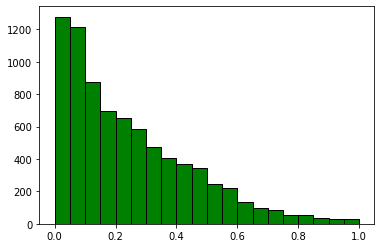

In [113]:
time = ev6_norm.loc[:, 'hitTime']
plt.hist(time, bins=20, ec='black', color='green')
plt.show()

In [121]:
def ev_mollweide (ev_map):
    # Set the coordinates for the input
    nside = 16
    npix = hp.nside2npix(nside)

    # Coordinates and the density field f
    thetas = PMT_spher_pd.loc[:, 'pmt_theta']
    phis = PMT_spher_pd.loc[:, 'pmt_phi']
    hitTime = ev_map.loc[:, 'hitTime']

    # Go from HEALPix coordinates to indices
    indices = hp.ang2pix(nside, thetas, phis)

    # Initate the map and fill it with the values
    hpxmap = np.zeros(npix, dtype=np.float)
    for i in range(len(ev_map)):
        hpxmap[indices[ev_map.loc[:, 'pmtID'].loc[i]]]  = hitTime.loc[i]
   # for j in range(len(hpxmap)):
   #     if hpxmap[j] == 0:
   #         hpxmap[j] = 1024
        
    # Inspect the map
    hp.mollview(hpxmap)

In [122]:
ev_mollweide(ev6_norm)

KeyError: 23